

# Project: Investigate a TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will analyze the TMDb Movie dataset.This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.

## Question to consider

* Which genres are most popular from year to year?
* What kinds of properties are associated with movies that have high revenues?
* What movie genre is most produced by movie producers?
* Has budget and revenue of movie changed over the years?

In [90]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [91]:
# Load data
df = pd.read_csv('tmdb-movies (1).csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [92]:
# Check entire column of data
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [93]:
# Check missing data and data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [94]:
#check number of missing values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [95]:
# summary statistic of our data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [96]:
# check number of duplicate rows
duplicate = df[df.duplicated()]
len(duplicate)

1


### Data Cleaning 

In this stage i will start by dropping columns that wont be needed in our analysis, drop duplicate row, and take care of missing values.

In [98]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [99]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [100]:
# drop columns that wont be needed for our analysis and equally contain too many missing values
column = ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies']
df.drop(column, axis=1,inplace=True)

In [101]:
# confirm columns have been dropped
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [102]:
# drop dublicate rows
df.drop_duplicates(inplace=True)

In [103]:
df.nunique()

id                10865
popularity        10814
budget              557
revenue            4702
original_title    10571
cast              10719
director           5067
runtime             247
genres             2039
release_date       5909
vote_count         1289
vote_average         72
release_year         56
budget_adj         2614
revenue_adj        4840
dtype: int64

In [104]:
#sum of missing values
df.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [106]:
#checking rows with missing values
df.isna().any()

id                False
popularity        False
budget            False
revenue           False
original_title    False
cast               True
director           True
runtime           False
genres             True
release_date      False
vote_count        False
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

In [107]:
#replace missing values of runtime with the mean. Since it contains numerical values
df['runtime'].fillna(df['runtime'].mean(), inplace=True)

In [108]:
#shape of data before dropping rows with missing values
df.shape

(10865, 15)

In [109]:
#drop all missing rows and include shape to see our data loss
df.dropna(inplace=True) 
df.shape

(10731, 15)

In [110]:
#confirm there are no missing values
df.isna().any()

id                False
popularity        False
budget            False
revenue           False
original_title    False
cast              False
director          False
runtime           False
genres            False
release_date      False
vote_count        False
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

In [111]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The genre column in our dataset is splitted with '|' which signifies that one movie can have different genres, this will affect our analysis. I will be removing '|' and separate each genres into individual rows in the following steps

In [115]:
df['genres_list'] = df['genres'].str.split('|')

In [116]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_list
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,"[Action, Adventure, Science Fiction, Thriller]"
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,"[Action, Adventure, Science Fiction, Thriller]"
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,"[Adventure, Science Fiction, Thriller]"
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,"[Action, Adventure, Science Fiction, Fantasy]"
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,"[Action, Crime, Thriller]"


In [117]:
df_genres = pd.DataFrame(df['genres_list'].tolist()).fillna(np.nan).add_prefix('genre_')

In [156]:
df_genres.head()

,genre_0,genre_1,genre_2,genre_3,genre_4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN
2,Adventure,Science Fiction,Thriller,NaN,NaN
3,Action,Adventure,Science Fiction,Fantasy,NaN
4,Action,Crime,Thriller,NaN,NaN


In [206]:
dataframe = []
for n in range(5): 
    df = df1.copy().reset_index()
    dataframe.append(df)

n = 0
for column in df_genres: 
    dataframe[n]['genres'] = df_genres[column] 
    n += 1

In [207]:
dataframe[4]['genres'].isnull().unique()

array([ True, False])

In [481]:
merge_df = pd.concat([dataframe[0],dataframe[1],dataframe[2], dataframe[3], dataframe[4]], axis=0, ignore_index=True)

In [482]:
# this dataframe  contains genres splitted into individual rows
merge_df.head()

,index,id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_list,genres
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,"[Action, Adventure, Science Fiction, Thriller]",Action
1,1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,"[Action, Adventure, Science Fiction, Thriller]",Action
2,2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,"[Adventure, Science Fiction, Thriller]",Adventure
3,3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,"[Action, Adventure, Science Fiction, Fantasy]",Action
4,4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,"[Action, Crime, Thriller]",Action


In [484]:
# drop missing values from our merged dataset
merge_df.dropna(inplace=True)

In [485]:
merge_df.shape

(26753, 17)

In [486]:
# drop colums not needed
merge_df.drop('genres_list',axis=1, inplace=True)

In [487]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26753 entries, 0 to 53640
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           26753 non-null  int64  
 1   id              26753 non-null  int64  
 2   popularity      26753 non-null  float64
 3   budget          26753 non-null  int64  
 4   revenue         26753 non-null  int64  
 5   original_title  26753 non-null  object 
 6   cast            26753 non-null  object 
 7   director        26753 non-null  object 
 8   runtime         26753 non-null  int64  
 9   release_date    26753 non-null  object 
 10  vote_count      26753 non-null  int64  
 11  vote_average    26753 non-null  float64
 12  release_year    26753 non-null  int64  
 13  budget_adj      26753 non-null  float64
 14  revenue_adj     26753 non-null  float64
 15  genres          26753 non-null  object 
dtypes: float64(4), int64(7), object(5)
memory usage: 3.5+ MB


In [488]:
# convert release_date column to datetime 
merge_df['release_date'] = pd.to_datetime(merge_df['release_date'])

In [489]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26753 entries, 0 to 53640
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           26753 non-null  int64         
 1   id              26753 non-null  int64         
 2   popularity      26753 non-null  float64       
 3   budget          26753 non-null  int64         
 4   revenue         26753 non-null  int64         
 5   original_title  26753 non-null  object        
 6   cast            26753 non-null  object        
 7   director        26753 non-null  object        
 8   runtime         26753 non-null  int64         
 9   release_date    26753 non-null  datetime64[ns]
 10  vote_count      26753 non-null  int64         
 11  vote_average    26753 non-null  float64       
 12  release_year    26753 non-null  int64         
 13  budget_adj      26753 non-null  float64       
 14  revenue_adj     26753 non-null  float64       
 15  ge

In [490]:
#confirm there are no duplicate rows
merge_df[merge_df.duplicated()]

,index,id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which genres are most popular from year to year?

In this session, We will explore how the popularity of our movie genre has changed. We will filter our data with release year within 15 to 20 years interval and observe if there has been any change in the popularity of our genre. Analyzing this we will help predict the kind of movies that stands the chance of having higher popularity in coming years.

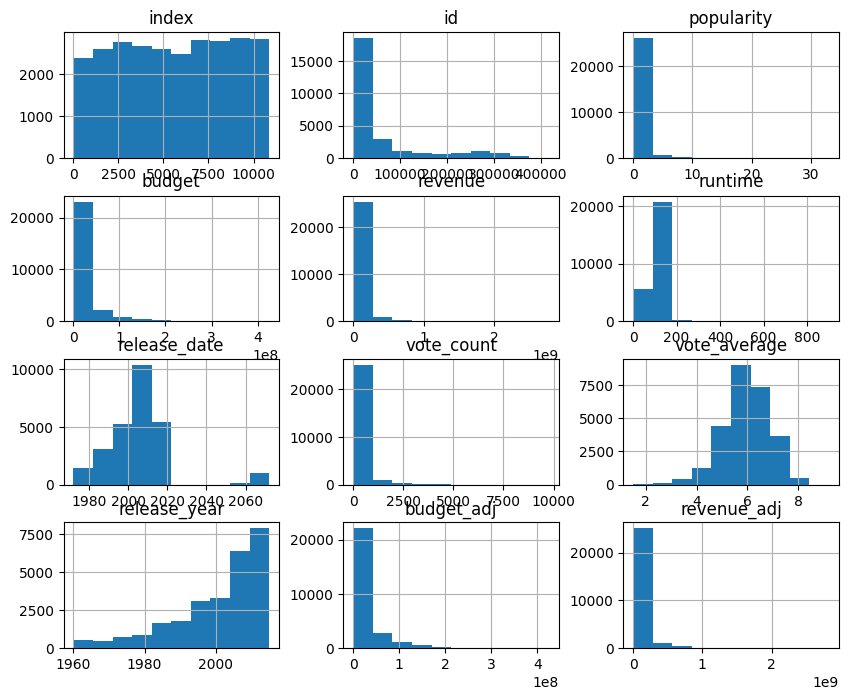

In [343]:
#Check the distribution of all dataset
merge_df.hist(figsize=(10, 8))
plt.show;

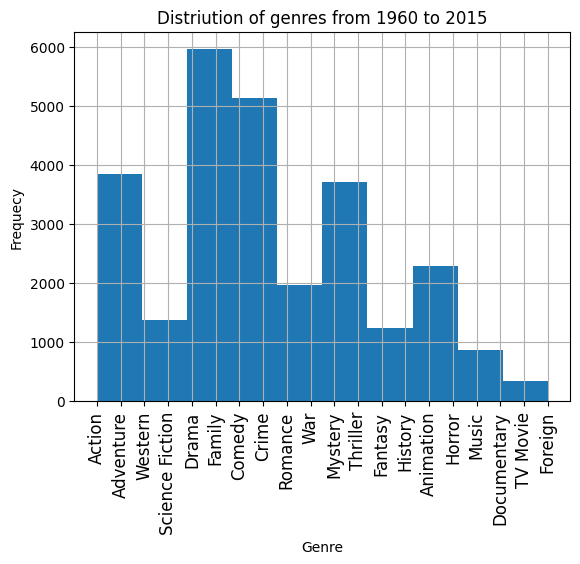

In [229]:
# Checking the distribution of genres for our entire dataframe
merge_df['genres'].hist()
plt.xticks(rotation= 'vertical', fontsize= 12)
plt.xlabel('Genre')
plt.ylabel('Frequecy')
plt.title('Distriution of genres from 1960 to 2015')

plt.show()

From the distribution of genres from our entire data. Drama, Family, Comedy are the most produced movie genre, does that make them the most popular genre. I expect movie producer to produce more movie genres that have high popularity. We will further explore our data

In [348]:
# filtered data from 2000 to 2015
df_filter1 = merge_df[merge_df['release_year'] >= 2000]
df_filter1.head()

,index,id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


In [344]:
#filter for release_year of movies from 1980 to 1999
df_filter2 = merge_df[(merge_df['release_year'] >= 1980)&(merge_df['release_year'] < 2000)]
df_filter2.head()

,index,id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
2355,2409,550,8.947905,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,139,1999-10-14,5923,8.1,1999,8.247033e+07,1.320229e+08,Drama
2356,2410,603,7.753899,63000000,463517383,The Matrix,Keanu Reeves|Laurence Fishburne|Carrie-Anne Mo...,Lilly Wachowski|Lana Wachowski,136,1999-03-30,6351,7.8,1999,8.247033e+07,6.067687e+08,Action
2357,2411,14,3.555720,15000000,356296601,American Beauty,Kevin Spacey|Annette Bening|Thora Birch|Wes Be...,Sam Mendes,122,1999-09-15,1756,7.7,1999,1.963579e+07,4.664111e+08,Drama
2358,2412,1893,3.526029,115000000,924317558,Star Wars: Episode I - The Phantom Menace,Liam Neeson|Ewan McGregor|Natalie Portman|Jake...,George Lucas,136,1999-05-19,2823,6.3,1999,1.505411e+08,1.209981e+09,Adventure
2359,2413,564,2.943770,80000000,415885488,The Mummy,Brendan Fraser|Rachel Weisz|John Hannah|Arnold...,Stephen Sommers,124,1999-05-06,1562,6.3,1999,1.047242e+08,5.444161e+08,Adventure


In [345]:
#filter for release_year of movies from 1960 to 1979
df_filter3 = merge_df[(merge_df['release_year'] >= 1960)&(merge_df['release_year'] < 1979)]
df_filter3.head()

,index,id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
1299,1329,11,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,Adventure
1300,1330,691,2.379469,14000000,185438673,The Spy Who Loved Me,Roger Moore|Barbara Bach|Curd JÃ¼rgens|Richard...,Lewis Gilbert,125,1977-07-07,279,6.2,1977,5.036893e+07,6.671677e+08,Adventure
1301,1331,11319,1.719385,1200000,71215869,The Rescuers,Bob Newhart|Eva Gabor|Geraldine Page|Joe Flynn...,John Lounsbery|Wolfgang Reitherman|Art Stevens,78,1977-06-22,332,6.6,1977,4.317337e+06,2.562191e+08,Fantasy
1302,1332,703,1.179653,4000000,38251425,Annie Hall,Woody Allen|Diane Keaton|Tony Roberts|Carol Ka...,Woody Allen,93,1977-04-19,493,7.6,1977,1.439112e+07,1.376203e+08,Comedy
1303,1333,11114,1.104997,10000000,0,Pete's Dragon,Sean Marshall|Helen Reddy|Mickey Rooney|Red Bu...,Don Chaffey,128,1977-11-03,113,6.4,1977,3.597781e+07,0.000000e+00,Fantasy


In [349]:
# popularity of genres from 2000 to 2015
df_filter1_pop = df_filter1.groupby('genres')['popularity'].mean().sort_values(ascending=False)
df_filter1_pop

genres
Adventure          1.399830
Fantasy            1.219300
Science Fiction    1.191822
Action             1.092890
Western            1.014758
Animation          0.888328
Family             0.880601
War                0.868900
Crime              0.820154
Thriller           0.799873
Mystery            0.781229
History            0.650151
Romance            0.646663
Comedy             0.641166
Drama              0.634139
Music              0.516209
Horror             0.477961
TV Movie           0.274889
Foreign            0.189937
Documentary        0.189229
Name: popularity, dtype: float64

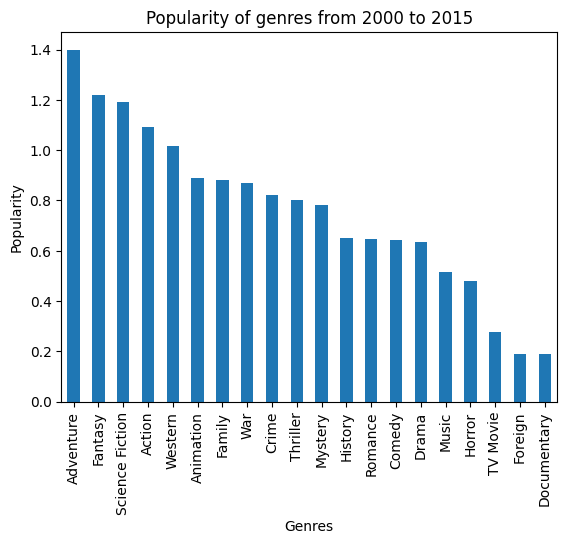

In [366]:
# barplot of popularity of genres from 2000 to 2015
df_filter1_pop.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.title('Popularity of genres from 2000 to 2015')
plt.show();

The visulaization above shows descending order of popularity within 2000 and 2015, It can be seen from our visualization that Adventure, Fantasy, Science Fiction, Action are the most popular genres.

In [353]:
# popularity of genres from 1980 to 1999
df_filter2_pop = df_filter2.groupby('genres')['popularity'].mean().sort_values(ascending=False)
df_filter2_pop

genres
Animation          0.908707
Adventure          0.811650
Science Fiction    0.766895
Fantasy            0.702869
Action             0.698657
Crime              0.671342
Family             0.663654
Thriller           0.654347
War                0.649072
Mystery            0.594726
Drama              0.541519
Comedy             0.534214
Romance            0.527651
History            0.524212
Western            0.496784
Horror             0.469883
Music              0.448125
TV Movie           0.241083
Foreign            0.195090
Documentary        0.183999
Name: popularity, dtype: float64

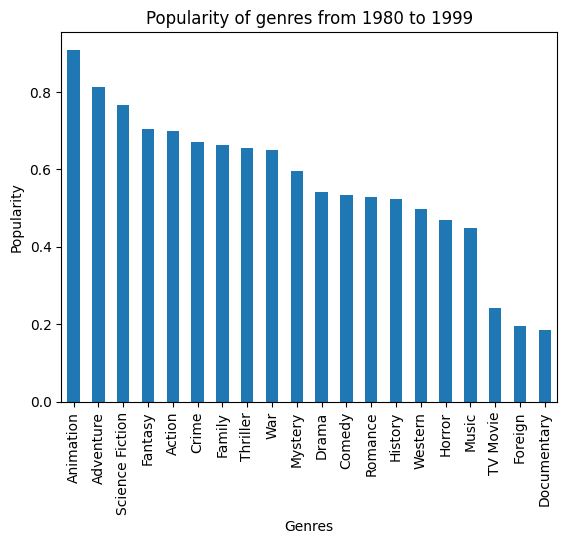

In [354]:
# barplot of popularity of genres from 1980 to 1999
df_filter2_pop.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.title('Popularity of genres from 1980 to 1999')
plt.show();

The visulaization above shows descending order of popularity within 1980 and 1999, It can be seen from our visualization that Animation, Adventure, Fantasy, Science Fiction, Action are the most popular genres. Popularity very similar to recent years, except for Animation whose popularity have declined in recent years

In [356]:
# popularity of genres from 1960 to 1979
df_filter3_pop = df_filter3.groupby('genres')['popularity'].mean().sort_values(ascending=False)
df_filter3_pop

genres
Animation          0.784847
Adventure          0.751865
Family             0.595083
Science Fiction    0.564203
Action             0.539841
Crime              0.525961
Thriller           0.509059
Fantasy            0.485719
Music              0.481371
Drama              0.441151
War                0.430039
History            0.421660
Comedy             0.419047
Mystery            0.408243
Romance            0.393609
Horror             0.334571
Western            0.334529
TV Movie           0.326821
Foreign            0.197519
Documentary        0.167606
Name: popularity, dtype: float64

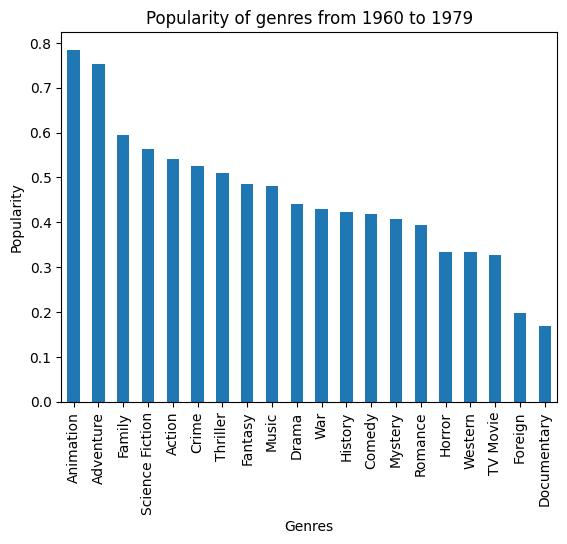

In [358]:
# barplot of popularity of genres from 1960 to 1979
df_filter3_pop.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.title('Popularity of genres from 1960 to 1979')
plt.show();

In [363]:
# merge popularity of three intervals (2000-2015), (1970-1999), (1960-1979) into a dataframe

dfpop_all = pd.concat([df_filter1_pop, df_filter2_pop, df_filter3_pop], axis=1)
dfpop_all.columns = ['pop_2000-2015', 'pop_1980-1999', 'pop_1960-1979']
dfpop_all

,pop_2000-2015,pop_1980-1999,pop_1960-1979
genres,,,
Adventure,1.399830,0.811650,0.751865
Fantasy,1.219300,0.702869,0.485719
Science Fiction,1.191822,0.766895,0.564203
Action,1.092890,0.698657,0.539841
Western,1.014758,0.496784,0.334529
Animation,0.888328,0.908707,0.784847
Family,0.880601,0.663654,0.595083
War,0.868900,0.649072,0.430039
Crime,0.820154,0.671342,0.525961


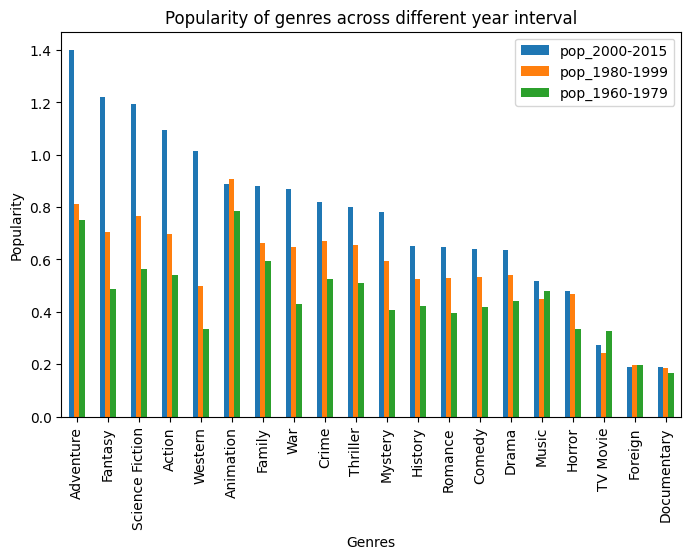

In [370]:
# Multiple bar chart, to compare popularity accross different release year interval
dfpop_all.plot(kind='bar', figsize=(8,5))
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.title('Popularity of genres across different year interval')
plt.show();

Our analysis shows that movie genres like Adventures, Fantasy, Science Fiction, Action, Animation have remained very popular genres over  many years, with only Animation showing decline in popularity in recent years. Adventure movies have advanced over the years and can be regarded as the most popular genres.

### Research Question 2: What movie genre is most produced by movie producers?

We will analyze movie genre that is most produced by movie producer and the factors that influences their choice. I would expect the most popular genre or genre with the highest revenue to be most considered. We will perform analysis to find out the most produced genre and the factorss that influences the decision.

In [371]:
# value count of genres from 2000 to 2015
df_2000s_count = df_filter1['genres'].value_counts()
df_2000s_count

Drama              3058
Comedy             2378
Thriller           1935
Action             1451
Horror             1075
Romance            1074
Adventure           875
Crime               804
Family              764
Science Fiction     727
Fantasy             545
Animation           523
Mystery             500
Documentary         422
Music               254
History             191
War                 151
Foreign             132
TV Movie            124
Western              54
Name: genres, dtype: int64

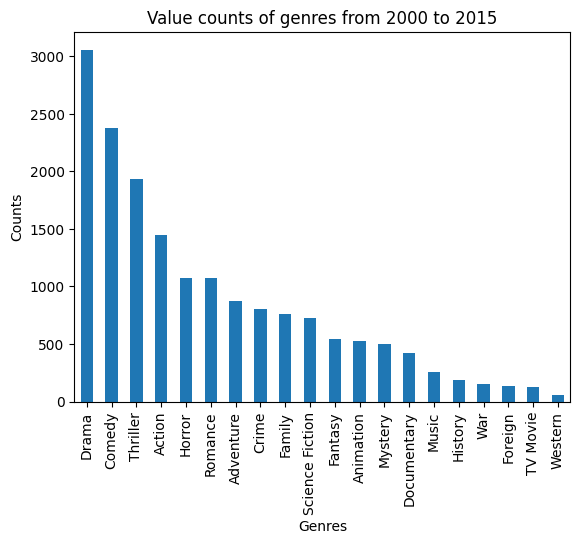

In [372]:
df_2000s_count.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.title('Value counts of genres from 2000 to 2015')
plt.show();

In [373]:
# Popularity of genres from 2000 to 2015
df20_pop = df_filter1.groupby('genres')['popularity'].mean().sort_values(ascending=False)
df20_pop

genres
Adventure          1.399830
Fantasy            1.219300
Science Fiction    1.191822
Action             1.092890
Western            1.014758
Animation          0.888328
Family             0.880601
War                0.868900
Crime              0.820154
Thriller           0.799873
Mystery            0.781229
History            0.650151
Romance            0.646663
Comedy             0.641166
Drama              0.634139
Music              0.516209
Horror             0.477961
TV Movie           0.274889
Foreign            0.189937
Documentary        0.189229
Name: popularity, dtype: float64

In [379]:
# VOte counts of genres from 2000 to 2015
df20s_vote= df_filter1.groupby('genres')['vote_count'].mean().sort_values(ascending=False)
df20s_vote

genres
Adventure          702.892571
Fantasy            585.110092
Science Fiction    575.925722
Action             527.839421
Western            486.018519
Crime              340.523632
War                335.682119
Family             333.691099
Animation          329.919694
Thriller           300.708527
Mystery            300.044000
History            214.638743
Comedy             212.503785
Drama              212.001308
Romance            199.032588
Music              144.976378
Horror             132.742326
TV Movie            38.661290
Documentary         37.720379
Foreign             16.227273
Name: vote_count, dtype: float64

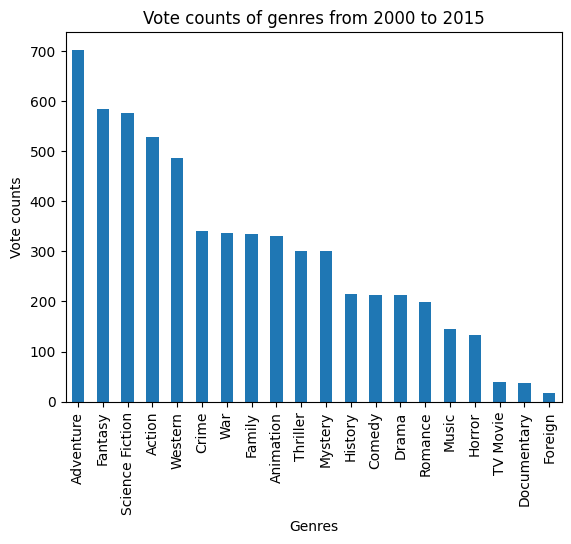

In [378]:
df20s_vote.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Vote counts')
plt.title('Vote counts of genres from 2000 to 2015')
plt.show();

In [380]:
# Revenue genearated by each genres from 2000 to 2015
df20s_revenue = df_filter1.groupby('genres')['revenue'].mean().sort_values(ascending=False)
df20s_revenue

genres
Adventure          1.491564e+08
Fantasy            1.338350e+08
Family             9.265618e+07
Action             8.893467e+07
Animation          8.773548e+07
Science Fiction    8.750435e+07
War                5.688754e+07
Western            5.094920e+07
Crime              4.556968e+07
Comedy             4.196997e+07
Thriller           4.186235e+07
Mystery            4.181484e+07
History            3.707095e+07
Romance            3.599379e+07
Music              2.946179e+07
Drama              2.880572e+07
Horror             1.691959e+07
Documentary        2.049550e+06
Foreign            1.751435e+06
TV Movie           0.000000e+00
Name: revenue, dtype: float64

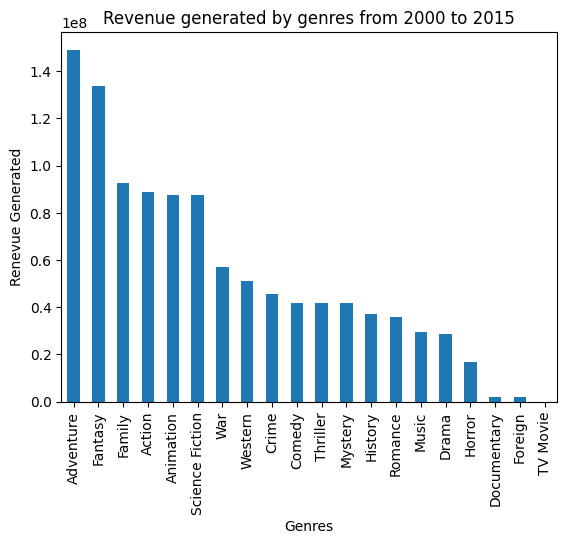

In [381]:
df20s_revenue.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Renevue Generated')
plt.title('Revenue generated by genres from 2000 to 2015')
plt.show();

In [382]:
# Budget for each genres from 2000 to 2015
df20s_budget = df_recent.groupby('genres')['budget'].mean().sort_values(ascending=False)
df20s_budget

genres
Adventure          5.100949e+07
Western            4.572778e+07
Fantasy            4.447765e+07
Action             3.515442e+07
Science Fiction    3.186323e+07
Family             3.083974e+07
War                2.814241e+07
Animation          2.764985e+07
History            2.320543e+07
Crime              2.118166e+07
Thriller           1.881450e+07
Mystery            1.837448e+07
Comedy             1.595630e+07
Romance            1.430583e+07
Drama              1.302782e+07
Music              1.077799e+07
Horror             6.518754e+06
Foreign            1.319240e+06
Documentary        5.885105e+05
TV Movie           3.201613e+05
Name: budget, dtype: float64

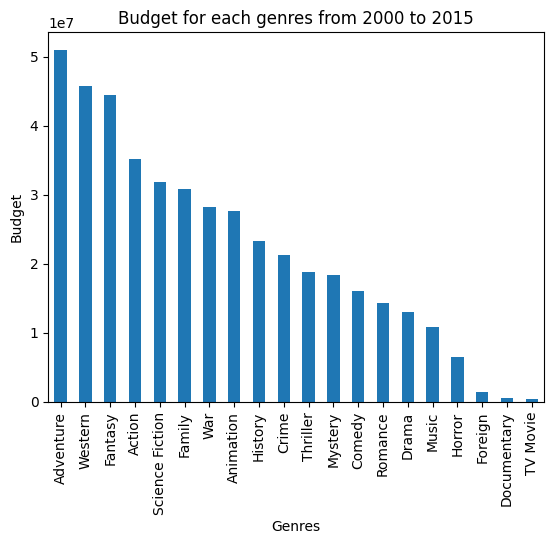

In [383]:
df20s_budget.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Budget')
plt.title('Budget for each genres from 2000 to 2015')
plt.show();

In [384]:
# dataframe containing the counts, revenuw, budget of each genre
new_df = pd.concat([df20s_budget, df_2000s_count], axis=1)

In [385]:
new_df.columns = ['budget', 'value_counts']

In [386]:
new_df['budget_in_millions'] = new_df['budget'] / 100000

In [387]:
new_df['revenue_in_millions'] = df20s_revenue / 100000

In [388]:
new_df

,budget,value_counts,budget_in_millions,revenue_in_millions
Adventure,5.100949e+07,875,510.094906,1491.564481
Western,4.572778e+07,54,457.277778,509.492006
Fantasy,4.447765e+07,545,444.776461,1338.350202
Action,3.515442e+07,1451,351.544180,889.346743
Science Fiction,3.186323e+07,727,318.632329,875.043546
Family,3.083974e+07,764,308.397387,926.561764
War,2.814241e+07,151,281.424115,568.875424
Animation,2.764985e+07,523,276.498492,877.354794
History,2.320543e+07,191,232.054343,370.709548
Crime,2.118166e+07,804,211.816605,455.696784


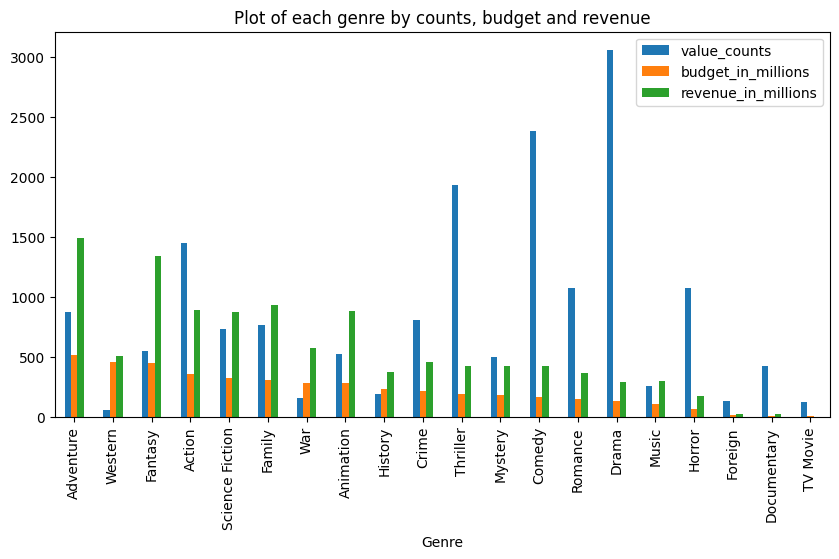

In [390]:
new_df.iloc[:, 1:].plot(kind= 'bar', figsize=(10, 5))
plt.xlabel('Genre')
plt.title('Plot of each genre by counts, budget and revenue')
plt.show();

From each of our visualization, it can be seen that the movie genre most produced are not the most popular movies, neither are they movies with the highest revenue. Take for instance, Drama, comedy, and thriller are the most produced genre. Adventure, Fantasy, Science Fiction, Family generate highest revenue, highest popularity and vote count. Analysis shows that producer considers the budget of the movie before producing the movie and they are not the most produced. Movies with lower budget are produced more even though they dont generate higher revenues compared to other genres

### Research Question 3: What kinds of properties are associated with movies that have high revenues?

We have seen from previous session that movie genres like adventure, action, fantasy, science fiction generate high revenue.In this session we will be considering other factors that makes up for high revenues for movies. We will consider the correlation between budget and revenue, popularity and revenue, vote counts and revenue. Does movies with high budget, popularity, vote generate the highest revenue.

In [392]:
merge_df.head()

,index,id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


In [396]:
sns.set_style('whitegrid')

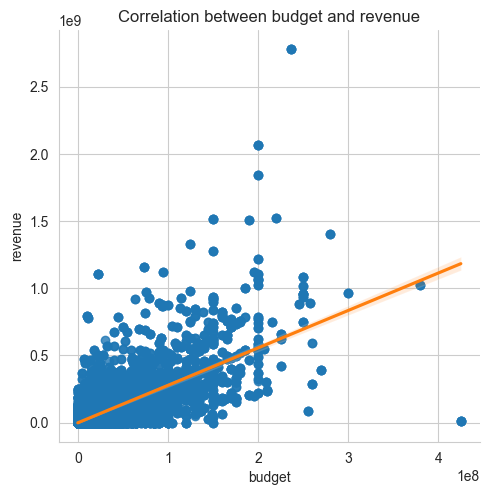

In [404]:
sns.lmplot(x= 'budget', y= 'revenue', data=merge_df, line_kws={"color": "C1"})
plt.title('Correlation between budget and revenue')
plt.show();

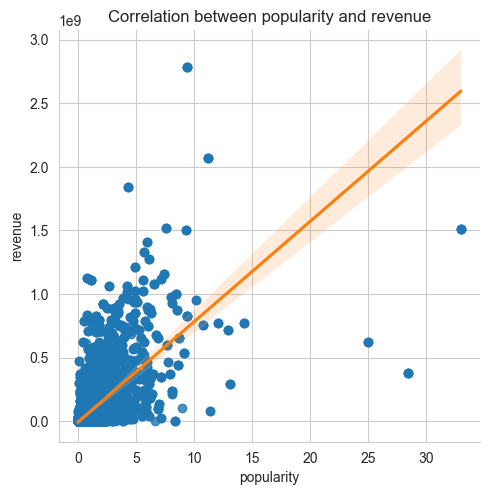

In [405]:
sns.lmplot(x= 'popularity', y= 'revenue', data=merge_df, line_kws={"color": "C1"})
plt.title('Correlation between popularity and revenue')
plt.show();

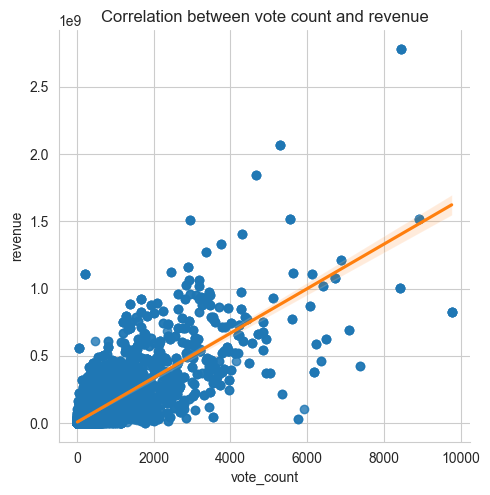

In [406]:
sns.lmplot(x= 'vote_count', y= 'revenue', data=merge_df, line_kws={"color": "C1"})
plt.title('Correlation between vote count and revenue')
plt.show();

The regression plots shows that there is a positive correlation between budget, popularity, and vote counts with revenue generated from movies. The higher the revenue, popularity and vote count the higher revenue generated. This three properties affects the revenue generated postively.

### Research Question 4: Has budget and revenue of movie change over the years?

In this session we will analyze how the budget and revenue for movies has changed in recent years.

In [407]:
merge_df.head()

,index,id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


In [491]:
# filter for movies from 2000 to 2015
df_filter = merge_df[merge_df['release_year'] >= 2000]
df_filter.head()

,index,id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


In [458]:
#filter for movies from 1980 to 1999
df_filter2.head()

,index,id,popularity,budget,revenue,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
2355,2409,550,8.947905,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,139,1999-10-14,5923,8.1,1999,8.247033e+07,1.320229e+08,Drama
2356,2410,603,7.753899,63000000,463517383,The Matrix,Keanu Reeves|Laurence Fishburne|Carrie-Anne Mo...,Lilly Wachowski|Lana Wachowski,136,1999-03-30,6351,7.8,1999,8.247033e+07,6.067687e+08,Action
2357,2411,14,3.555720,15000000,356296601,American Beauty,Kevin Spacey|Annette Bening|Thora Birch|Wes Be...,Sam Mendes,122,1999-09-15,1756,7.7,1999,1.963579e+07,4.664111e+08,Drama
2358,2412,1893,3.526029,115000000,924317558,Star Wars: Episode I - The Phantom Menace,Liam Neeson|Ewan McGregor|Natalie Portman|Jake...,George Lucas,136,1999-05-19,2823,6.3,1999,1.505411e+08,1.209981e+09,Adventure
2359,2413,564,2.943770,80000000,415885488,The Mummy,Brendan Fraser|Rachel Weisz|John Hannah|Arnold...,Stephen Sommers,124,1999-05-06,1562,6.3,1999,1.047242e+08,5.444161e+08,Adventure


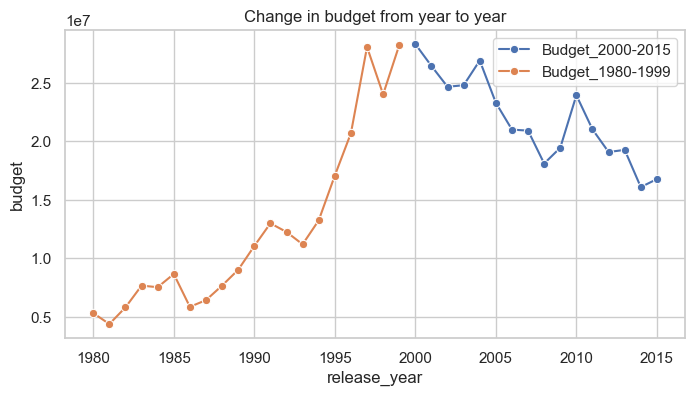

In [506]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x='release_year', y='budget', data= df_filter, label= 'Budget_2000-2015', errorbar=None, ax=ax, marker='o')
sns.lineplot(x='release_year', y='budget', data= df_filter2, label= 'Budget_1980-1999', errorbar=None, ax=ax, marker='o')
plt.title('Change in budget from year to year')
plt.show();

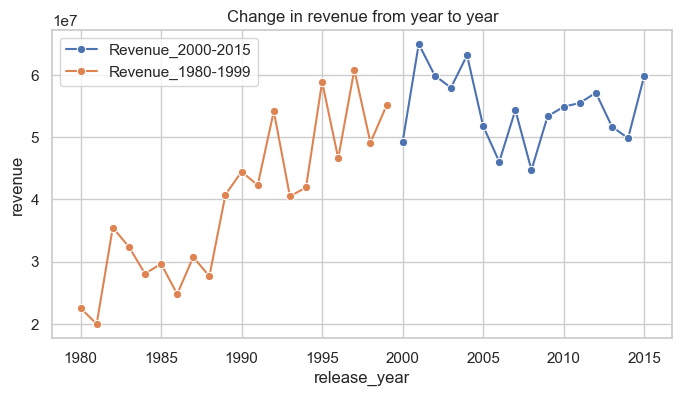

In [505]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x='release_year', y='revenue', data= df_filter, label= 'Revenue_2000-2015', errorbar=None, ax=ax, marker='o')
sns.lineplot(x='release_year', y='revenue', data= df_filter2, label= 'Revenue_1980-1999', errorbar=None, ax=ax, marker='o')
plt.title('Change in revenue from year to year')
plt.show();

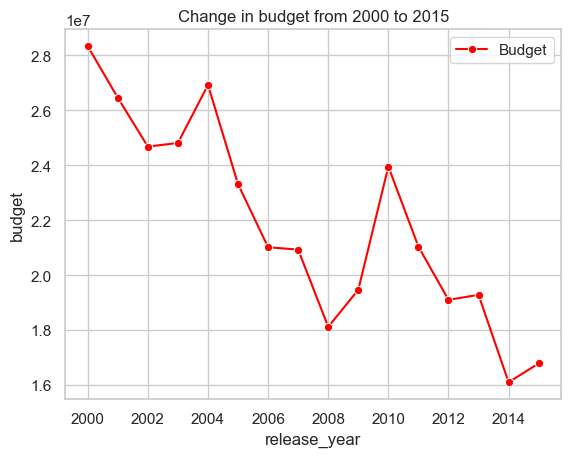

In [498]:
sns.lineplot(x='release_year', y='budget', data= df_filter, label= 'Budget', errorbar=None, marker='o', c= 'red')
plt.title('Change in budget from 2000 to 2015')
#g.set_xticklabels(label)
plt.show(); 

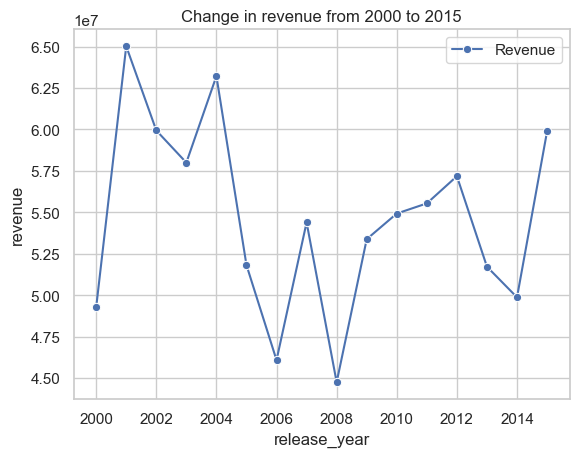

In [507]:
sns.lineplot(x='release_year', y='revenue', data= df_filter, label= 'Revenue', errorbar=None, marker='o')
plt.title('Change in revenue from 2000 to 2015')
plt.show();

From our visualization we observe a massive decline in budget from movies after year 2000.The highest budget was in year 2000 and we observed a decline in budget after. Looking closely at year 2000 to 2015, i saw that budget further declined in year 2014. It's safe to say from our findings that there has been a decline in budget for movies in recent years.
Similarly, we found that revenue generated from movie rose from 1980 to 2001. 2001 had the highest revenue, 2008 had the least revenue. There also seem to be a rise in revenue from 2014 to 2015, in this year we saw that budget was increased. It's safe to say in recent years, take for instance 2015 the budget wasnt has high as many other years but the rise in revenue was impressive.

## Conclusion

Based on my analysis we can reach following conclusions:
1. Adventure, Science fiction, Action are the most popular movie genre in recent years. Animation was very popular in older years but there has been a decline in Animation recently. Movies with high popularity have greater revenues.
2. The most produced movie genres are not usually the most popular or one with highest revenues, because the budget for movies are great factors. Budget is a great factor that influences the rate at which movies are produced.
3. There is a positive correlation between budget, popularity, and vote counts with revenue generated from movies. Movies with higher budget, popularity and vote counts have the highest revenue.
4. A decline in budget for movies was observed after year 2000. It's worthy to note from my observation from year 2014 to 2015 that the movie industry want to generate high revenue with reduced budget.

Limitation of my exploration is that information for locations wasnt included. It most likely that different genre will be preffered in different location which will influence the popularity, vote counts and revenues.

## Refrence

Data Science with python course- Datacamp